In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

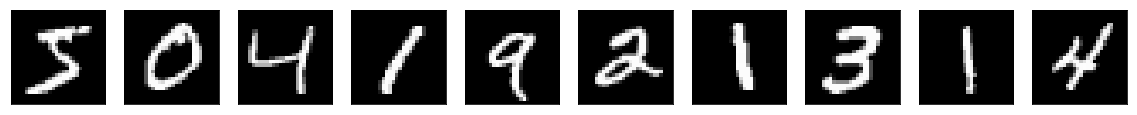

In [4]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
#     ax = plt.subplot(2, n, i + 1 + n)
#     plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
import keras.utils
num_classes=10

In [6]:
import numpy as np
a=np.arange(784)
b=np.arange(784,1568)
c=np.arange(1568,2352)
d=np.arange(2352,3136)
e=np.arange(3136,3920)
images=np.array([a,b,c,d,e])

In [7]:
images_test=[]
for i in range(12000):
    images_test.append(np.array([a,b,c,d,e]))

In [8]:
images_test=np.asarray(images_test)

In [9]:
x_train=x_train.reshape(60000,784)
x_new=[]
test=[]
for i in range(1,60001):
    test.append(x_train[i-1])
    if i%5==0:
        x_new.append(test)
        test=[]

In [10]:
x_new=np.asarray(x_new)
x_new.shape
x_new[0].shape

(5, 784)

In [11]:
images_test=x_new
images_test[0].shape

(5, 784)

In [12]:
final=[]
for i in range(12000):
    final.append(np.hstack(images_test[i].reshape(5,28,28)))

In [34]:
final=np.asarray(final)
final.shape
final=final.reshape(12000,28,140,1)

In [14]:
y=[]
yt=[]
for i in range(1,60001):
    yt.append(y_train[i-1])
    if i%5==0:
        y.append(yt)
        yt=[]

In [15]:
y=np.asarray(y)
y.shape

(12000, 5)

In [16]:
final_y=[]
for i in range(12000):
    final_y.append(np.hstack(y[i]))

In [17]:
final_y=np.asarray(final_y)
final_y.shape

(12000, 5)

In [18]:
ytt=final_y
ytt = keras.utils.to_categorical(ytt, num_classes)

In [19]:
ytt=ytt.reshape(12000,50)

In [20]:
x_for_test=[]
x_test=x_test.reshape(10000,784)
test=[]
for i in range(1,10001):
    test.append(x_test[i-1])
    if i%5==0:
        x_for_test.append(test)
        test=[]

In [21]:
x_for_test=np.asarray(x_for_test)
x_for_test.shape
x_for_test[0].shape

(5, 784)

In [22]:
final_test=[]
for i in range(2000):
    final_test.append(np.hstack(x_for_test[i].reshape(5,28,28)))

In [33]:
final_test=np.asarray(final_test)
final_test.shape
final_test=final_test.reshape(2000,28,140,1)

In [24]:
y_for_test=[]
yt1=[]
for i in range(1,10001):
    yt1.append(y_test[i-1])
    if i%5==0:
        y_for_test.append(yt1)
        yt1=[]

In [25]:
y_for_test=np.asarray(y_for_test)
y_for_test.shape

(2000, 5)

In [26]:
ytt1 = keras.utils.to_categorical(y_for_test, num_classes)
ytt1=ytt1.reshape(2000,50)

In [27]:
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, Input, Conv2D
from keras.applications.vgg16 import VGG16

In [38]:
visible=Input(shape=(28,140,1))
hidden1=Conv2D(16, (3,3), activation='relu')(visible)
hidden2=Conv2D(16, (3,3), activation='relu')(hidden1)
flat=Flatten()(hidden2)
hidden3=Dense(512, activation='relu')(flat)
drop=Dropout(0.2)(hidden3)
hidden4=Dense(512, activation='relu')(drop)
drop2=Dropout(0.2)(hidden4)
output=Dense(50, activation='linear')(drop2)

In [39]:
model=Model(inputs=visible,outputs=output)

In [42]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(final, ytt,
                    batch_size=128,
                    epochs=10,
                    verbose=1)

Epoch 1/10
 1664/12000 [===>..........................] - ETA: 1:29 - loss: 0.0930 - acc: 0.0048

KeyboardInterrupt: 